In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pck
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#Loading dataset from training
data = pd.read_csv('./data/dataset_malwares.csv', sep=',')

#The target is Malware Column {0=Benign, 1=Malware}
X = data.drop(['Name','Malware'], axis=1)
y = data['Malware']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=101)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [4]:
X_new = pd.DataFrame(X_scaled, columns=X.columns)
X_new.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,1.076024,0.0,1.379922,-0.623512,-0.087645,0.000436,-0.000677,-0.067061,-0.019125,-0.040622
1,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,-0.656755,0.249356,-0.087645,-0.016366,-0.059942,-0.060538,-0.020494,-0.040622
2,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,1.125337,1.886949,-0.063126,-0.011787,-0.056269,-0.059451,-0.020494,-0.040622
3,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,0.106999,0.434744,-0.087645,-0.016366,-0.075943,-0.045862,-0.020494,5.561297
4,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,-0.274878,-0.113695,-0.087645,-0.016366,-0.038952,-0.045862,-0.020494,-0.006233


In [5]:
skpca = PCA(n_components=55)
X_pca = skpca.fit_transform(X_new)
print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])

Variance sum :  0.9872673777501166


In [6]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
model = RFC(n_estimators=100, random_state=0, 
                          oob_score = True,
                          max_depth = 16, 
                          max_features = 'sqrt')
model.fit(X_pca, y_train)

X_test_scaled = scaler.transform(X_test)
X_test_new = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_pca = skpca.transform(X_test_new)

y_pred = model.predict(X_test_pca)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       974
           1       0.99      0.99      0.99      2949

    accuracy                           0.99      3923
   macro avg       0.98      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923



<AxesSubplot:>

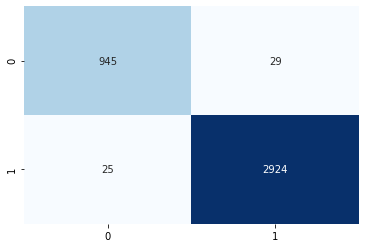

In [8]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)

In [9]:
from sklearn.svm import SVC

In [10]:
model = SVC()

In [11]:
model.fit(X_pca,y_train)

SVC()

In [12]:
predictions = model.predict(X_test_pca)

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       974
           1       0.98      0.98      0.98      2949

    accuracy                           0.97      3923
   macro avg       0.96      0.96      0.96      3923
weighted avg       0.97      0.97      0.97      3923



<AxesSubplot:>

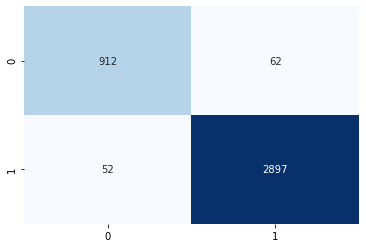

In [14]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}


In [17]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)


In [18]:
grid.fit(X_pca, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   6.7s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   5.8s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   6.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   6.1s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   5.7s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   2.7s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   3.2s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   2.7s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   2.8s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   2.7s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   3.0s
[CV 2/5] END ..............................C=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [19]:
grid.best_params_

{'C': 100, 'gamma': 0.1}

In [20]:
grid.best_estimator_

SVC(C=100, gamma=0.1)

In [21]:
grid_predictions = grid.predict(X_test_pca)

In [22]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       974
           1       0.99      0.99      0.99      2949

    accuracy                           0.98      3923
   macro avg       0.98      0.97      0.98      3923
weighted avg       0.98      0.98      0.98      3923



<AxesSubplot:>

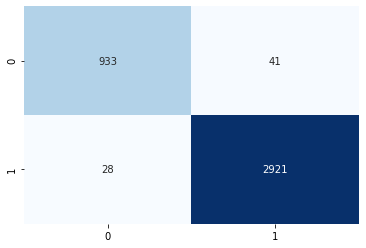

In [23]:
sns.heatmap(confusion_matrix(y_test,grid_predictions), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_pca, y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
pred = knn.predict(X_test_pca)

<AxesSubplot:>

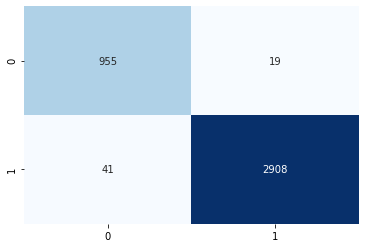

In [28]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       974
           1       0.99      0.99      0.99      2949

    accuracy                           0.98      3923
   macro avg       0.98      0.98      0.98      3923
weighted avg       0.98      0.98      0.98      3923



In [30]:
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_pca,y_train)
    pred_i = knn.predict(X_test_pca)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

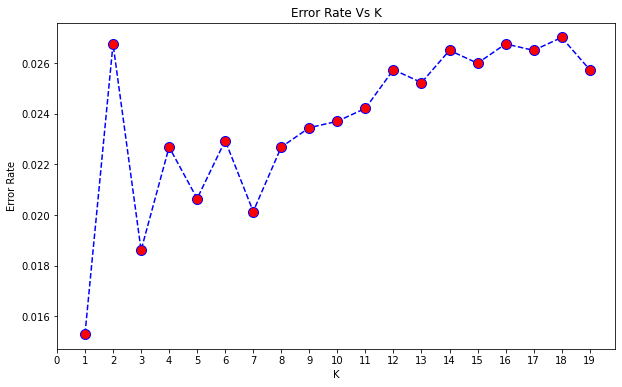

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue',linestyle="--",marker="o", markerfacecolor='red',markersize=10)
plt.title("Error Rate Vs K")
plt.xlabel("K")
plt.xticks(np.arange(0, 20, step=1))
plt.ylabel("Error Rate")